# Design of traveltime_linearvol learner

We design a learner to predict Travel Time from the traffic volume.

## Import Data

In [1]:
# allow importing modules and datafiles up one directory
import os
os.chdir('../')

import pandas as pd
import numpy as np
import datetime
import math
import datatables.traveltime

In [2]:
data = datatables.traveltime.read('data/traveltime.task.train')
data.head()

,id,t,volume,y
0,0,2015-08-19 00:00:00,32,660.0
1,1,2015-08-19 00:15:00,20,598.0
2,2,2015-08-19 00:30:00,24,637.5
3,3,2015-08-19 00:45:00,16,637.5
4,4,2015-08-19 01:00:00,9,566.0


'y' is travel time in seconds.

## Extract Features

We create the feature $volume^2$, in order to allow the regression algorithm to find quadratic fits.

In [3]:
def extract_features(data):
    # Turn list into a n*1 design matrix. At this stage, we only have a single feature in each row.
    vol = data['volume'].values[:, np.newaxis]
    # Add vol^2 as feature to allow quadratic regression
    xs = np.hstack([vol, vol**2])
    return xs

vol = data['volume'].values[:, np.newaxis]
xs = extract_features(data)
y = data['y'].values

## Model

Train model, plot regression curve.

/home/asimmons/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


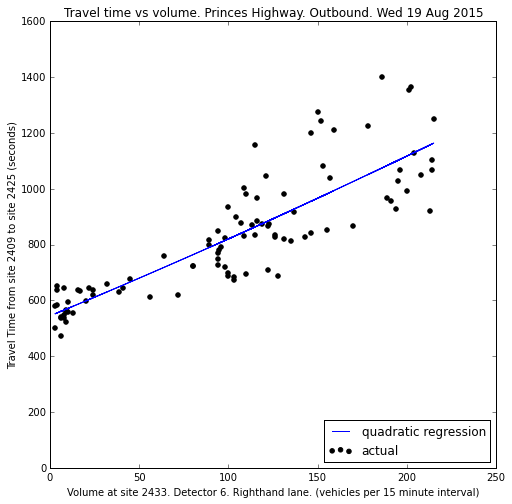

Intercept: 544.28
Coefficients: [  2.65413473e+00   1.05709369e-03]
R^2 score: 0.72


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(xs, y)
y_pred = regr.predict(xs)

plt.figure(figsize=(8,8))
plt.scatter(vol, y, color='black', label='actual')
plt.plot(vol, y_pred, color='blue', label='quadratic regression')

plt.title("Travel time vs volume. Princes Highway. Outbound. Wed 19 Aug 2015")
plt.ylabel("Travel Time from site 2409 to site 2425 (seconds)")
plt.xlabel("Volume at site 2433. Detector 6. Righthand lane. (vehicles per 15 minute interval)")
plt.legend(loc='lower right')
plt.xlim([0,None])
plt.ylim([0,None])
plt.show()

# http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
print('Intercept: %.2f' % regr.intercept_)
print('Coefficients: %s' % regr.coef_)
print('R^2 score: %.2f' % regr.score(xs, y))

## Evaluate

In [5]:
test = datatables.traveltime.read('data/traveltime.task.test') # Traffic on Wed 27 Aug 2015
test_xs = extract_features(test)
test['pred'] = regr.predict(test_xs)
test['error'] = test['y'] - test['pred']
# todo: ensure data is a real number (complex numbers could be used to cheat)
rms_error = math.sqrt(sum(test['error']**2) / len(data))

In [6]:
test.head()

,id,t,volume,y,pred,error
0,96,2015-08-26 00:00:00,23,615.0,605.882672,9.117328
1,97,2015-08-26 00:15:00,40,628.0,652.135110,-24.135110
2,98,2015-08-26 00:30:00,25,643.5,611.292423,32.207577
3,99,2015-08-26 00:45:00,18,648.5,592.395294,56.104706
4,100,2015-08-26 01:00:00,8,685.0,565.579103,119.420897


In [7]:
rms_error

123.94013223229568